In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dataScipy import DataScience as DS

### <span style="color:RED">1: Download The Data</span>

In [2]:
DATA = pd.read_csv("Dishwasher_L01.csv", header=None)
MONTHS = list(DATA[0])
SALES = list(DATA[1])

### <span style="color:RED">2 and 3: Plot The Data</span>

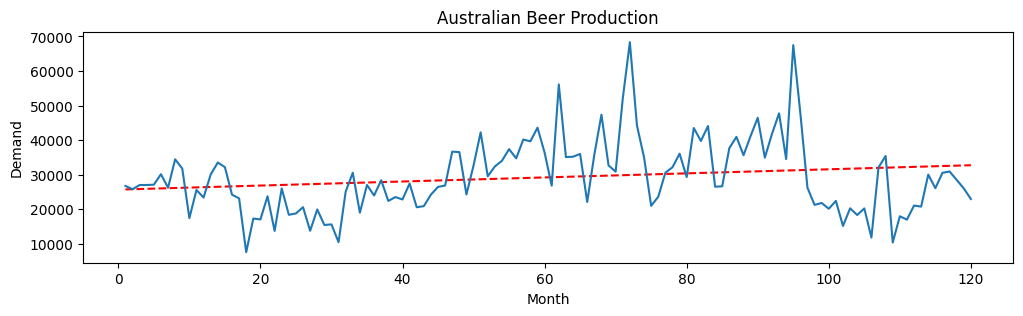

In [3]:
z = np.polyfit(MONTHS, SALES, 1)
p = np.poly1d(z)

plt.figure(figsize=(12, 3))
plt.plot(MONTHS, p(MONTHS), 'r--')
plt.plot(MONTHS, SALES)
plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Australian Beer Production')
plt.show()

### <span style="color:RED">4: Naive Forecast</span>

In [4]:
naive_forecast = DS.make_forecast_for_all_data(SALES, DS.naive_forecast)

### <span style="color:RED">4.a: Compute Errors</span>

In [5]:
DS.print_error_summary(SALES, naive_forecast, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)

Error Summary
-------------
MAE: 7002.4878
MAPE: 26.9542
MSE: 92464126.6830
RMSE: 9615.8269


### <span style="color:RED">4.b: Plot Data and Forecast, Plot Errors</span>

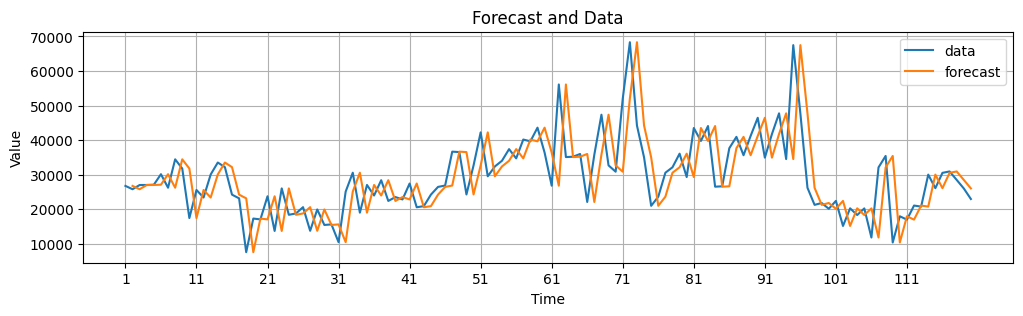

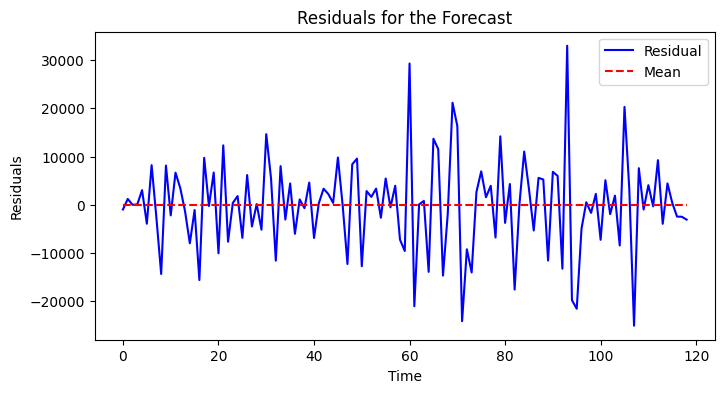

Mean of Residual:   -31.8824
S.D. of Residual:   9656.4329
Half Width :        1752.9444   (degree of freedom = 118, Confidence Level = 0.95)
p-value :           0.9713


In [6]:
DS.plot_forecasts(SALES, MONTHS, naive_forecast, time_step=10)

naive_errors = DS.get_all_residuals(SALES, naive_forecast)
DS.plot_resids(naive_errors)
DS.print_resids_summary(naive_errors)

### <span style="color:RED">4.c: Plot Normalized Errors</span>

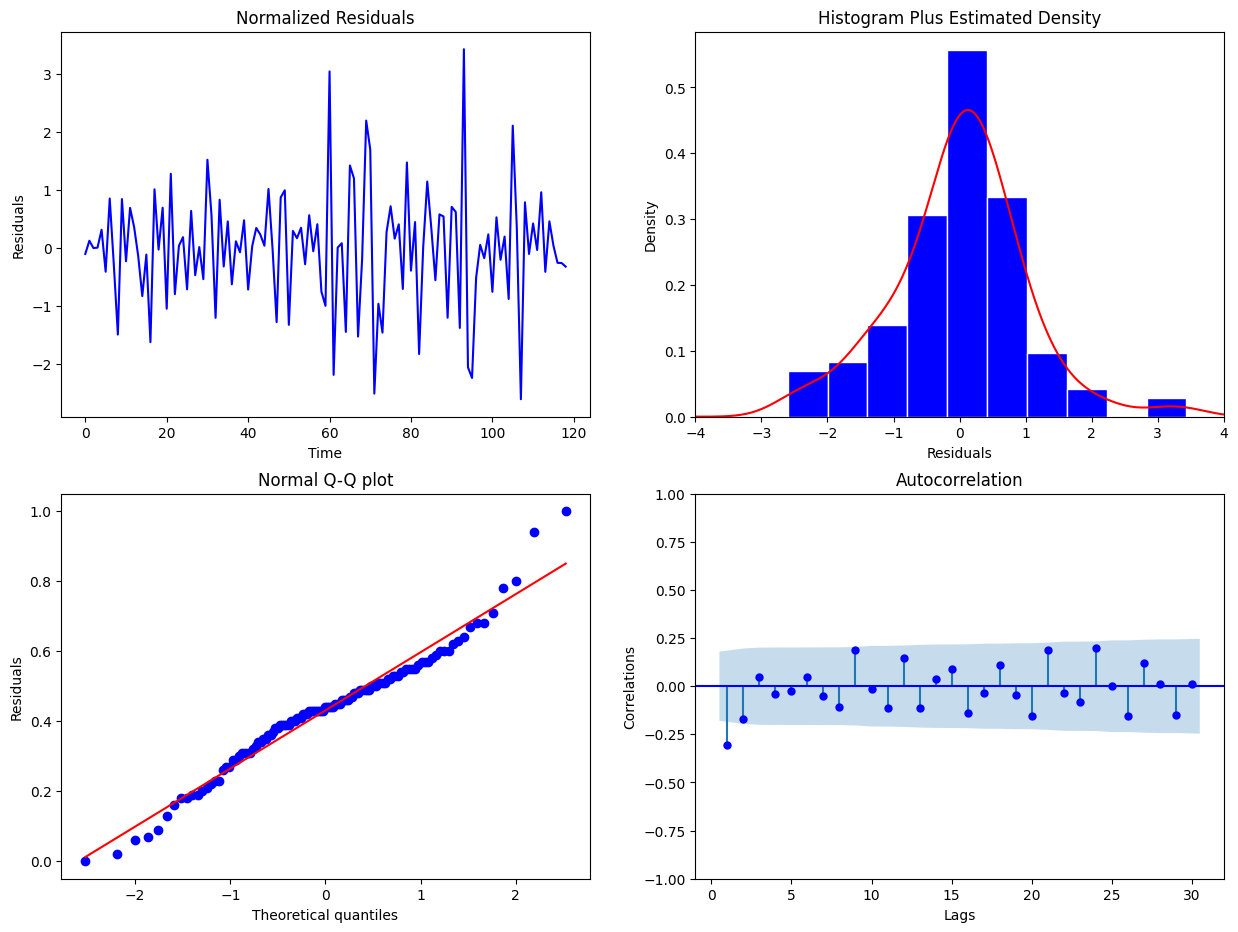

In [7]:
DS.show_all_normalized_resids_plots(naive_errors)

### <span style="color:RED">5: MA(3)</span>

In [8]:
ma3_forecast = DS.make_forecast_for_all_data(SALES, DS.MA_forecast, N=3)

### <span style="color:RED">5.a: Compute Errors</span>

In [9]:
DS.print_error_summary(SALES, ma3_forecast, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)

Error Summary
-------------
MAE: 6715.8947
MAPE: 26.2049
MSE: 84111407.6022
RMSE: 9171.2272


### <span style="color:RED">5.b: Plot Data and Forecast, Plot Errors</span>

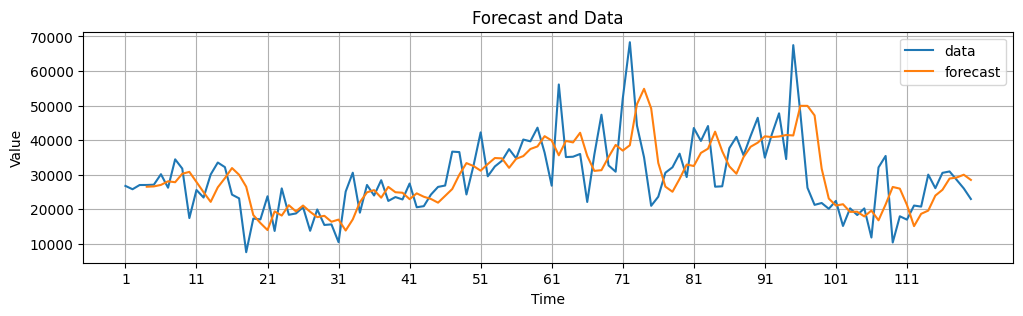

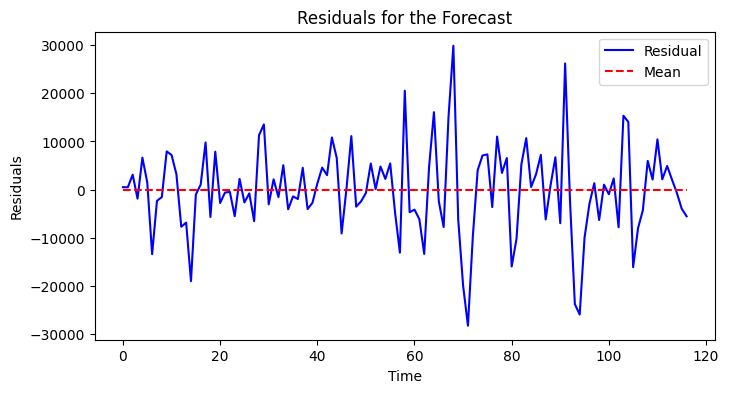

Mean of Residual:   -28.3248
S.D. of Residual:   9210.6296
Half Width :        1686.5486   (degree of freedom = 116, Confidence Level = 0.95)
p-value :           0.9735


In [10]:
DS.plot_forecasts(SALES, MONTHS, ma3_forecast, time_step=10)

ma3_errors = DS.get_all_residuals(SALES, ma3_forecast)
DS.plot_resids(ma3_errors)
DS.print_resids_summary(ma3_errors)

### <span style="color:RED">5.c: Plot Normalized Errors</span>

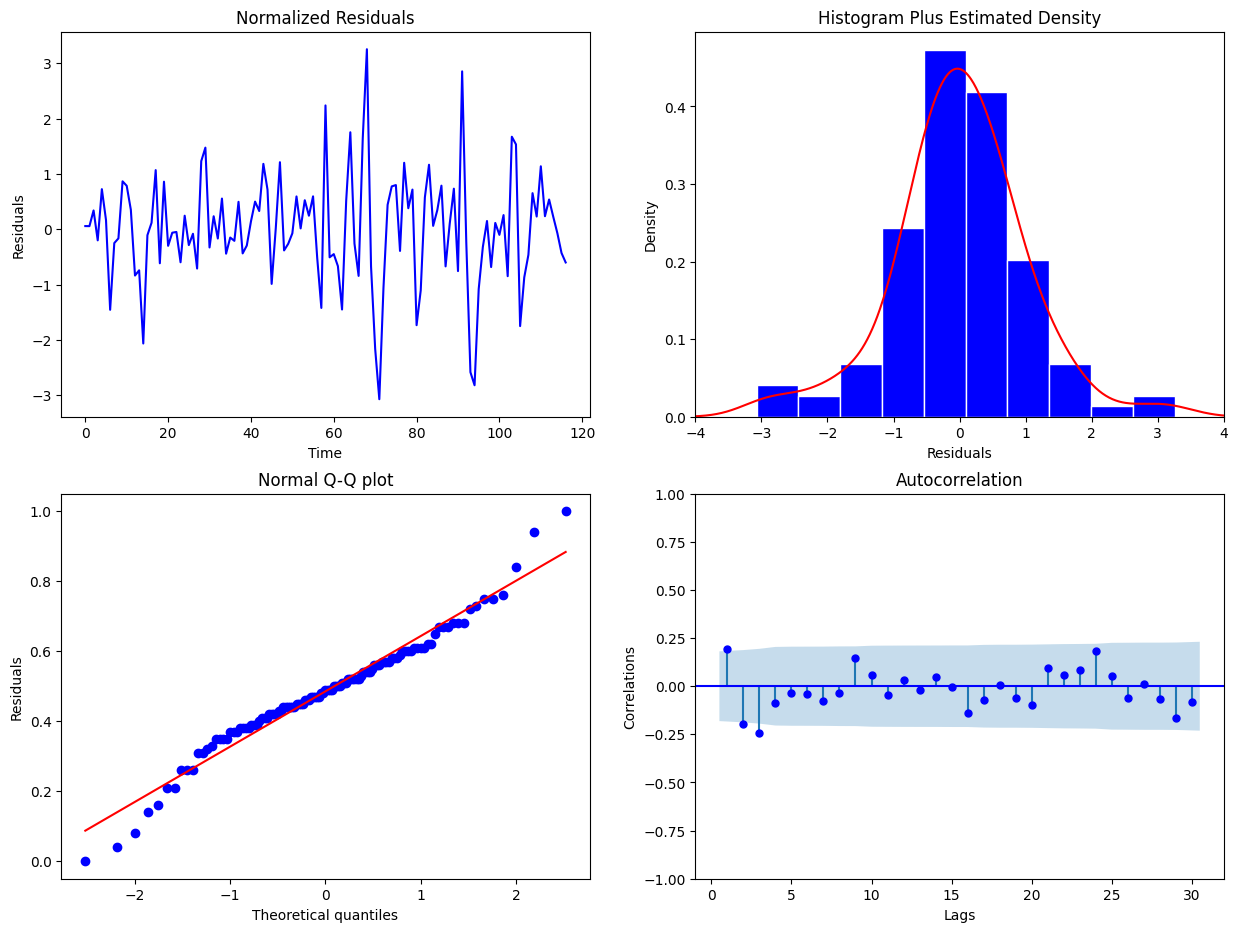

In [11]:
DS.show_all_normalized_resids_plots(ma3_errors)

### <span style="color:RED">6: Short Term Trend Forecast</span>

In [12]:
def short_term_trend_forecast(data):
    """
    This function takes in a list of data and returns a list of forecasts
    for the next N periods based on a short-term trend forecast.
    """

    if len(data) < 3:
        return None

    return data[-1] + (data[-2] - data[-3])

In [13]:
stt_forecast = DS.make_forecast_for_all_data(SALES, short_term_trend_forecast)

### <span style="color:RED">6.a: Compute Errors</span>

In [14]:
DS.print_error_summary(SALES, stt_forecast, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)

Error Summary
-------------
MAE: 10653.3720
MAPE: 40.4054
MSE: 219873900.7686
RMSE: 14828.1456


### <span style="color:RED">6.b: Plot Data and Forecast, Plot Errors</span>

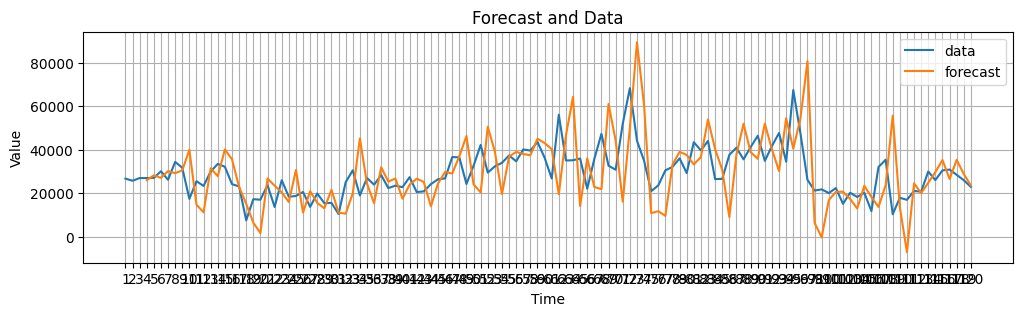

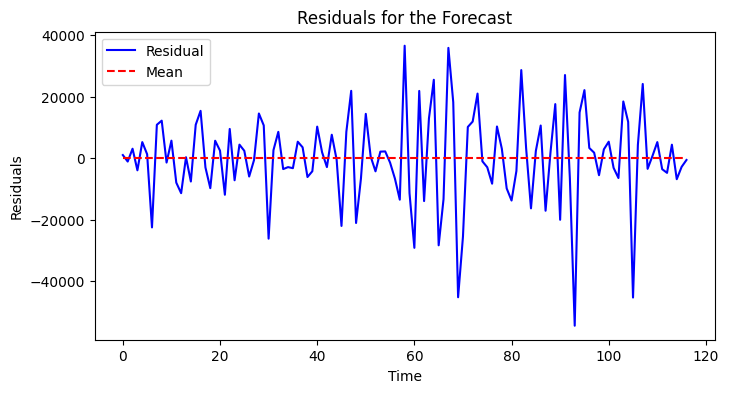

Mean of Residual:   -49.5556
S.D. of Residual:   14891.8397
Half Width :        2726.8290   (degree of freedom = 116, Confidence Level = 0.95)
p-value :           0.9713


In [15]:
DS.plot_forecasts(SALES, MONTHS, stt_forecast)

stt_errors = DS.get_all_residuals(SALES, stt_forecast)
DS.plot_resids(stt_errors)
DS.print_resids_summary(stt_errors)

### <span style="color:RED">6.c: Plot Normalized Errors</span>

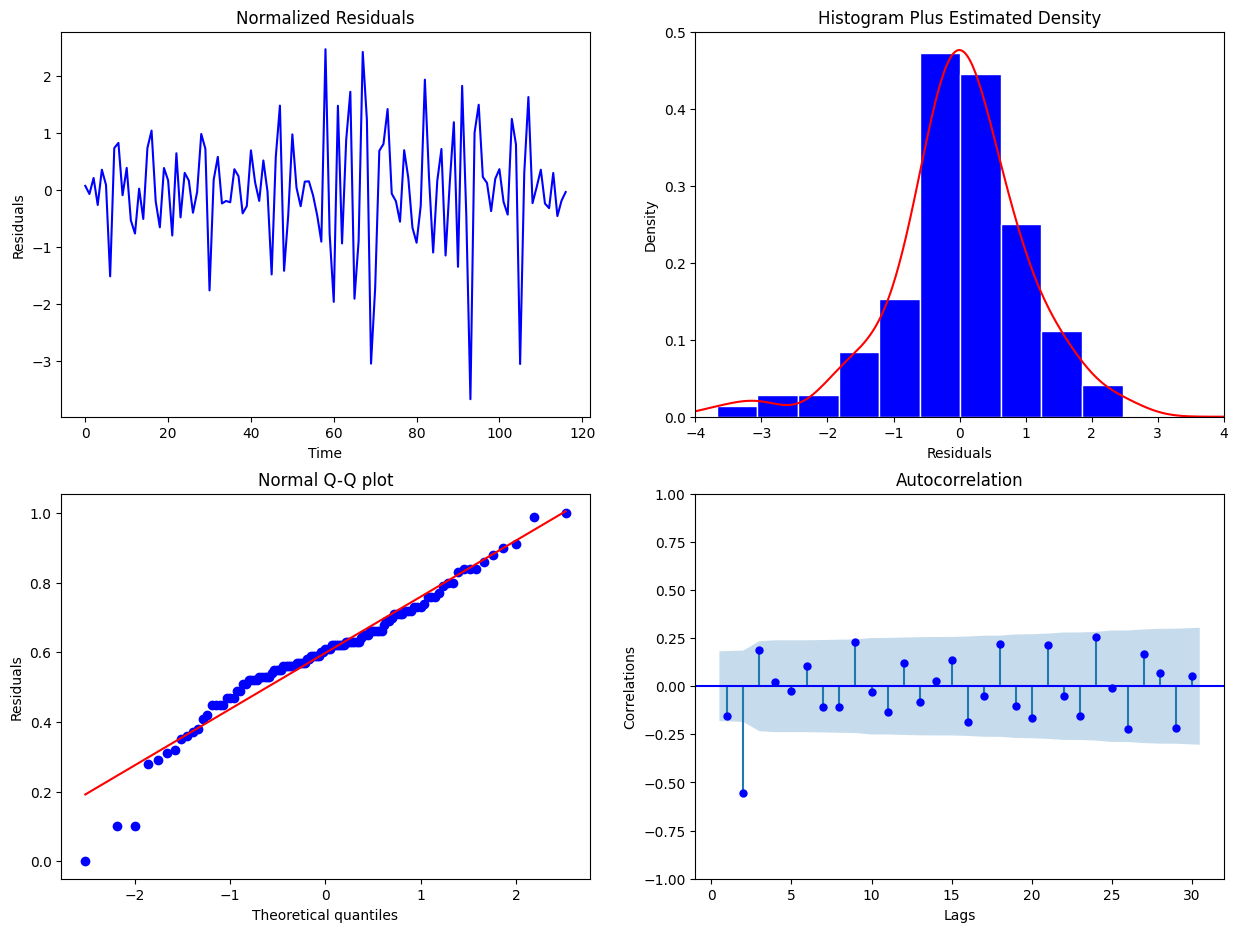

In [16]:
DS.show_all_normalized_resids_plots(stt_errors)

### <span style="color:RED">7: Seasonal(12)</span>

In [17]:
season12_forecast = DS.make_forecast_for_all_data(SALES, DS.seasonal_forecast, k=12)

### <span style="color:RED">7.a: Compute Errors</span>

In [18]:
DS.print_error_summary(SALES, season12_forecast, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)

Error Summary
-------------
MAE: 10848.6598
MAPE: 43.8179
MSE: 180296748.2891
RMSE: 13427.4625


### <span style="color:RED">7.b: Plot Data and Forecast, Plot Errors</span>

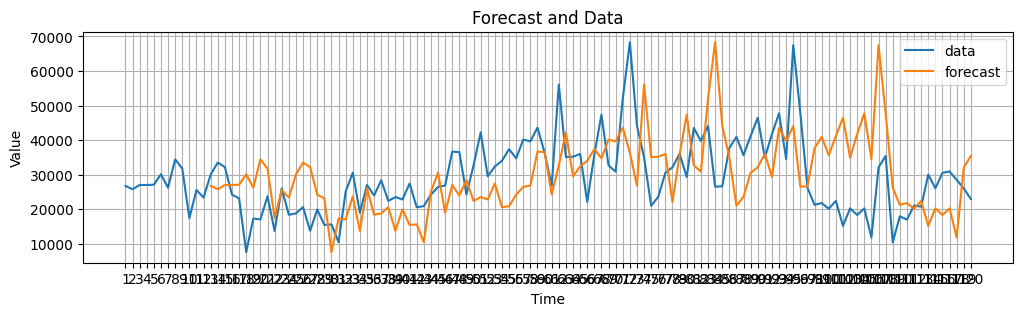

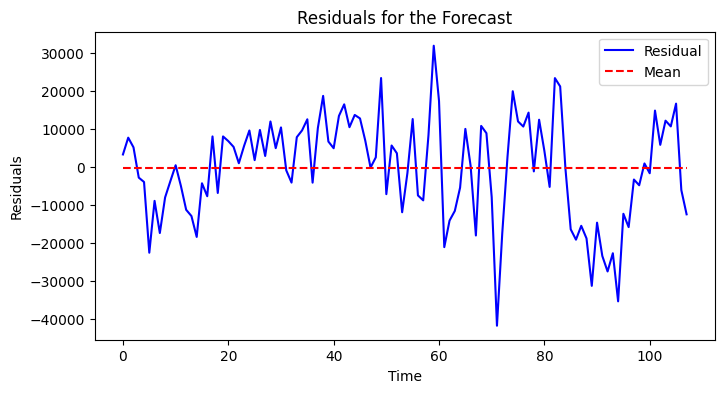

Mean of Residual:   -374.5648
S.D. of Residual:   13484.8120
Half Width :        2572.2944   (degree of freedom = 107, Confidence Level = 0.95)
p-value :           0.7734


In [19]:
DS.plot_forecasts(SALES, MONTHS, season12_forecast)

season12_errors = DS.get_all_residuals(SALES, season12_forecast)
DS.plot_resids(season12_errors)
DS.print_resids_summary(season12_errors)

### <span style="color:RED">7.c: Plot Normalized Errors</span>

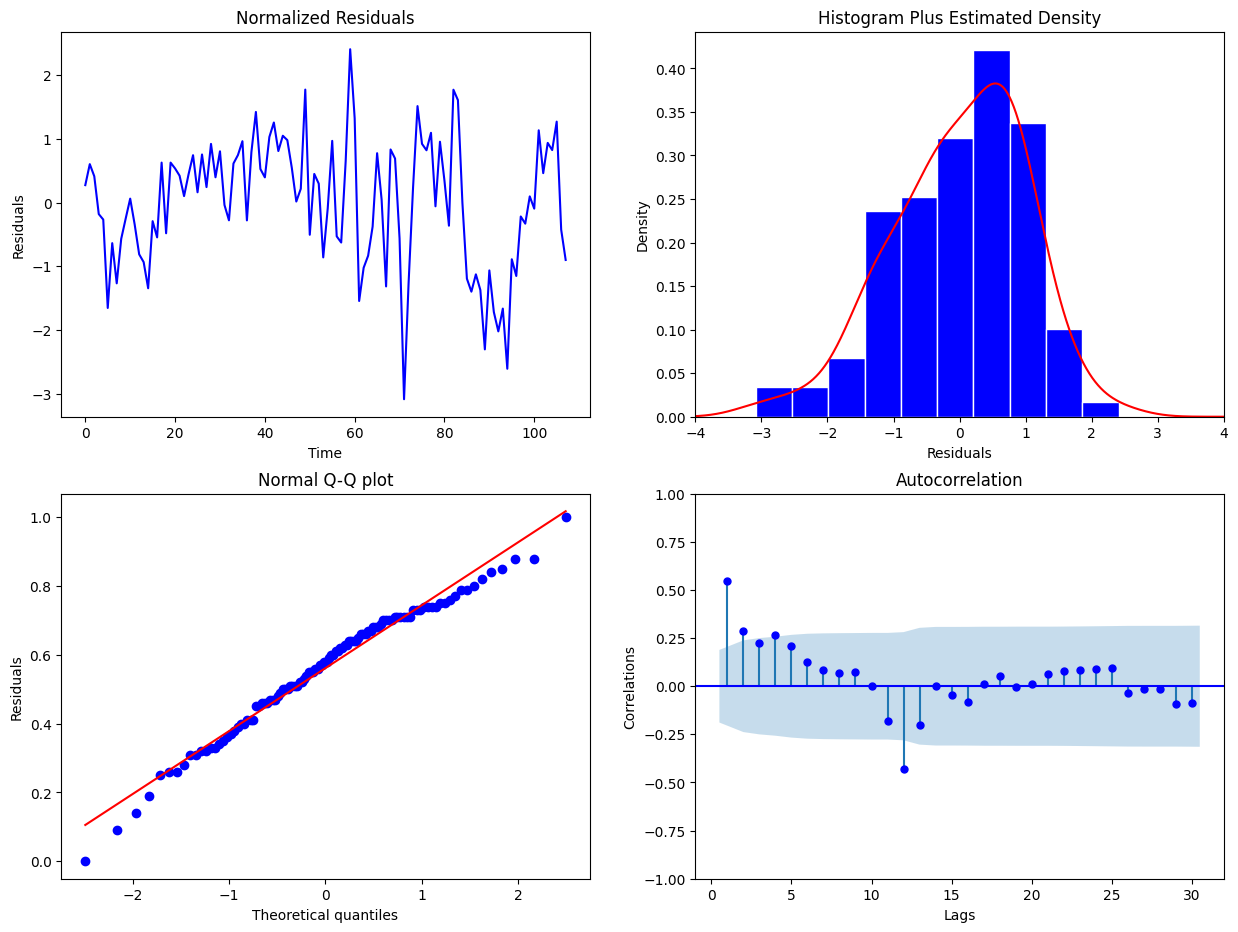

In [20]:
DS.show_all_normalized_resids_plots(season12_errors)

### <span style="color:RED">8: ES(0.7)</span>

In [21]:
es07_forecast = DS.make_forecast_for_all_data(SALES, DS.ES_forecast, alpha=0.7)

### <span style="color:RED">8.a: Compute Errors</span>

In [22]:
DS.print_error_summary(SALES, es07_forecast, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)

Error Summary
-------------
MAE: 6575.9471
MAPE: 25.2919
MSE: 79934590.7389
RMSE: 8940.6147


### <span style="color:RED">8.b: Plot Data and Forecast, Plot Errors</span>

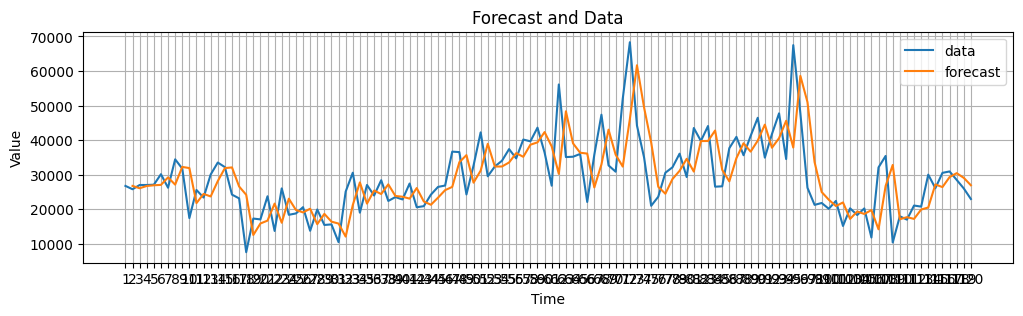

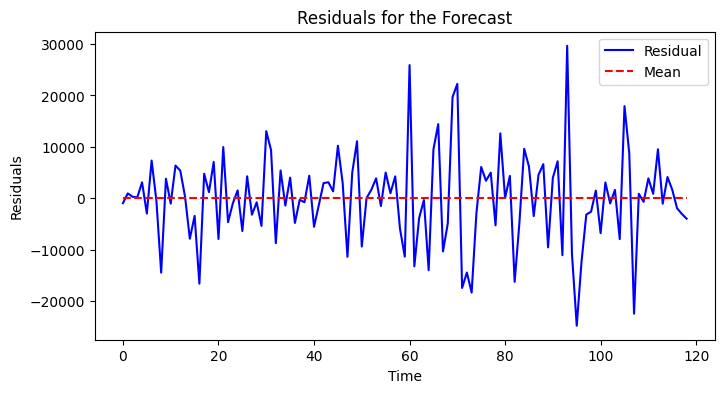

Mean of Residual:   -31.1983
S.D. of Residual:   8978.3640
Half Width :        1629.8537   (degree of freedom = 118, Confidence Level = 0.95)
p-value :           0.9698


In [23]:
DS.plot_forecasts(SALES, MONTHS, es07_forecast)

es07_errors  = DS.get_all_residuals(SALES, es07_forecast)
DS.plot_resids(es07_errors)
DS.print_resids_summary(es07_errors)

### <span style="color:RED">8.c: Plot Normalized Errors</span>

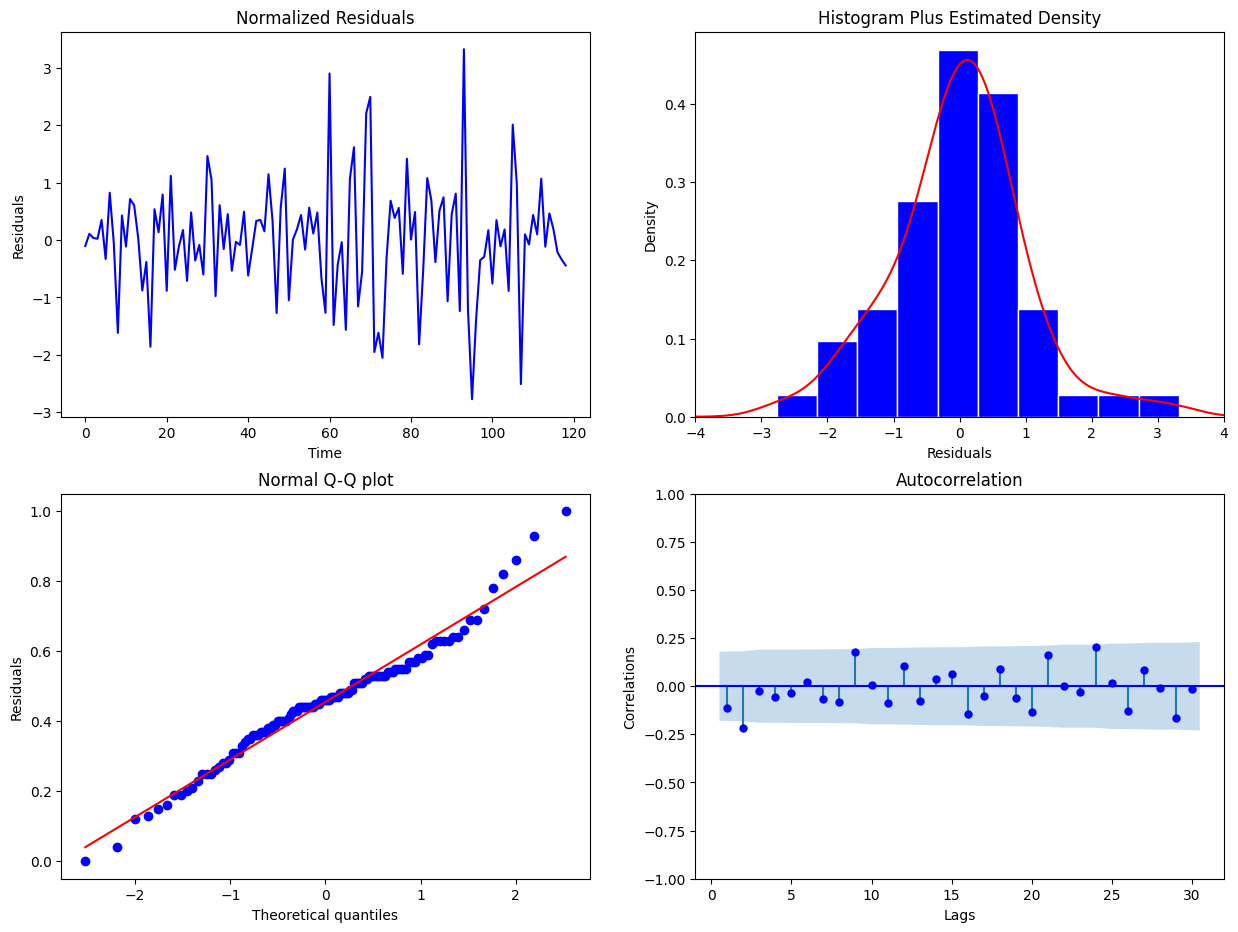

In [24]:
DS.show_all_normalized_resids_plots(es07_errors)

### <span style="color:RED">SUMMARY</span>

In [25]:
forecasts = {
    "Naive": naive_forecast,
    "MA(3)": ma3_forecast,
    "STT": stt_forecast,
    "Seasonal(12)": season12_forecast,
    "ES(0.7)": es07_forecast
}

df = DS.compare_forecasts(SALES, forecasts, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)
df


,MAE,MAPE,MSE,RMSE
Naive,7002.49,26.95,92464126.68,9615.83
MA(3),6715.89,26.20,84111407.60,9171.23
STT,10653.37,40.41,219873900.77,14828.15
Seasonal(12),10848.66,43.82,180296748.29,13427.46
ES(0.7),6575.95,25.29,79934590.74,8940.61


### <span style="color:RED">9: MA(3, 2-period ahead) vs MA(3, 3-period ahead) vs Short Term Trend</span>

In [26]:
ma3_2ahead_forecast = DS.make_forecast_for_all_data(SALES, DS.MA_forecast, N=3, step_ahead=2)
ma3_3ahead_forecast = DS.make_forecast_for_all_data(SALES, DS.MA_forecast, N=3, step_ahead=3)
stt_forecast = stt_forecast

forecasts_q9 = {
    "MA(3) 2-ahead": ma3_2ahead_forecast,
    "MA(3) 3-ahead": ma3_3ahead_forecast,
    "STT": stt_forecast
}

question9_df = DS.compare_forecasts(SALES, forecasts_q9, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)
question9_df

,MAE,MAPE,MSE,RMSE
MA(3) 2-ahead,7235.25,28.48,102761643.80,10137.14
MA(3) 3-ahead,7753.31,30.70,111450358.90,10557.01
STT,10653.37,40.41,219873900.77,14828.15


### <span style="color:RED">10: Find Alpha that minimizes the MSE</span>

In [27]:
alpha_values = np.arange(0.1, 1.0, 0.01)

es_forecasts = {}
for alpha in alpha_values:
    es_forecasts["ES({:.2f})".format(alpha)] = DS.make_forecast_for_all_data(SALES, DS.ES_forecast, alpha=alpha)

question10_df = DS.compare_forecasts(SALES, es_forecasts, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)

miminum_mse = question10_df[question10_df['MSE'] == question10_df['MSE'].min()]
miminum_mse

,MAE,MAPE,MSE,RMSE
ES(0.35),6363.39,24.96,74538525.87,8633.57


### <span style="color:RED">11: MA(5) vs MA(3)</span>

In [28]:
ma5_forecast = DS.make_forecast_for_all_data(SALES, DS.MA_forecast, N=5)
ma3_forecast_v2 = DS.make_forecast_for_all_data(SALES, DS.MA_forecast, N=3)

forecasts_q11 = {
    "MA(5)": ma5_forecast,
    "MA(3)": ma3_forecast_v2
}

question11_df = DS.compare_forecasts(SALES, forecasts_q11, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)
question11_df

,MAE,MAPE,MSE,RMSE
MA(5),6860.55,26.96,86046371.70,9276.12
MA(3),6715.89,26.20,84111407.60,9171.23


### <span style="color:RED">12: Seasonality and Trend Forecast</span>

In [29]:
def yt_forecast_method(data):
    """
    This function takes in a list of data and returns a list of forecasts
    for the next period based on a yt forecast method.
    """

    if len(data) < 15:
        return None

    return (data[-1] - data[-13]) + (data[-2] - data[-14]) - (data[-3] - data[-15]) + data[-12]

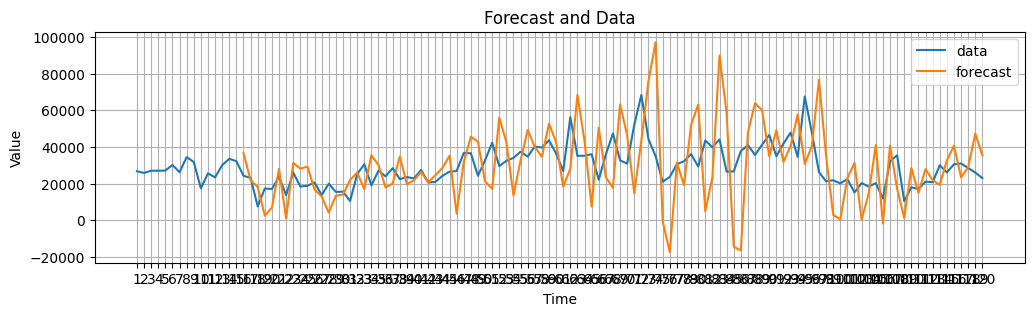

Error Summary
-------------
MAE: 15245.0699
MAPE: 54.2545
MSE: 395500565.5027
RMSE: 19887.1960


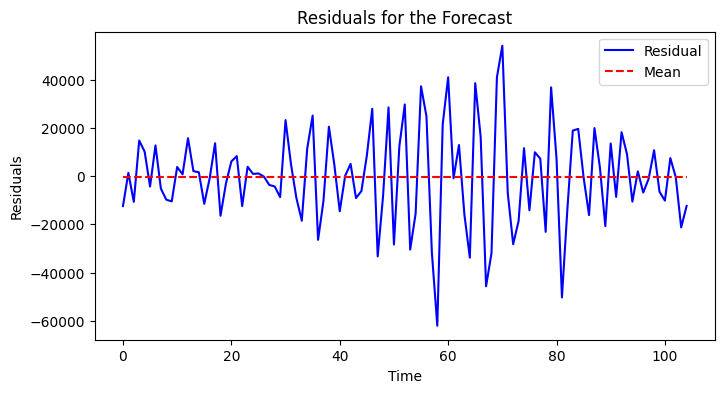

Mean of Residual:   -295.6286
S.D. of Residual:   19980.3708
Half Width :        3866.6942   (degree of freedom = 104, Confidence Level = 0.95)
p-value :           0.8798


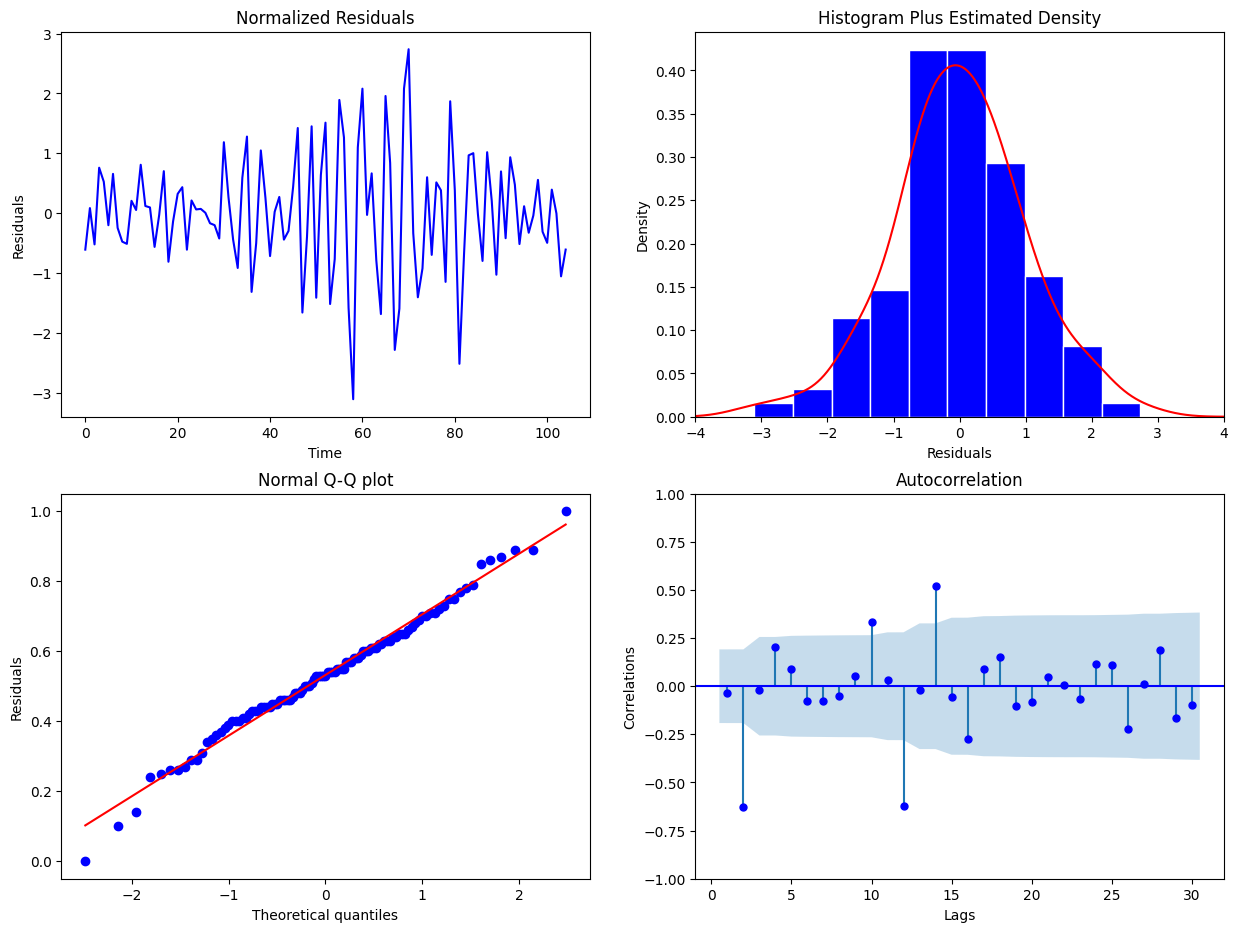

In [30]:
yt_forecasts = DS.make_forecast_for_all_data(SALES, yt_forecast_method)

DS.plot_forecasts(SALES, MONTHS, yt_forecasts)

DS.print_error_summary(SALES, yt_forecasts, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)

yt_errors = DS.get_all_residuals(SALES, yt_forecasts)
DS.plot_resids(yt_errors)
DS.print_resids_summary(yt_errors)

DS.show_all_normalized_resids_plots(yt_errors)